In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ppdd = pd.read_csv('https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv')

In [3]:
ppdd.shape

(1503, 11)

In [4]:
ppdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby and partner         1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [5]:
ppdd.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [6]:
ppdd.drop('Timestamp', axis=1, inplace=True)
ppdd =ppdd.dropna(axis=0)
# To clean column name
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [8]:
corr=ppdd.corr()
corr_feeling_anxious = corr['feeling_anxious']

# Sort the correlation values in descending order
sorted_corr = corr_feeling_anxious.sort_values(ascending=False)

# Get the top correlated features
top_corr_features = sorted_corr.index[1:6]  # Exclude the first index because it's 'Feeling anxious' itself

top_corr_features

Index(['problems_of_bonding_with_baby',
       'problems_concentrating_or_making_decision', 'age',
       'irritable_towards_baby_and_partner', 'suicide_attempt'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [12]:
y = ppdd.feeling_anxious

ppdd_features = ppdd[['age', 'problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision',  'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        1192 non-null   int64
 1   problems_of_bonding_with_baby              1192 non-null   int64
 2   problems_concentrating_or_making_decision  1192 non-null   int64
 3   irritable_towards_baby_and_partner         1192 non-null   int64
 4   suicide_attempt                            1192 non-null   int64
dtypes: int64(5)
memory usage: 55.9 KB
None


In [48]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state = 42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [49]:
svm_classifier.score(X_train, y_train)

0.8213087248322147

In [50]:
svm_classifier.score(X_test, y_test)

0.8394648829431438

In [ ]:
#model not over fitting

In [51]:
# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

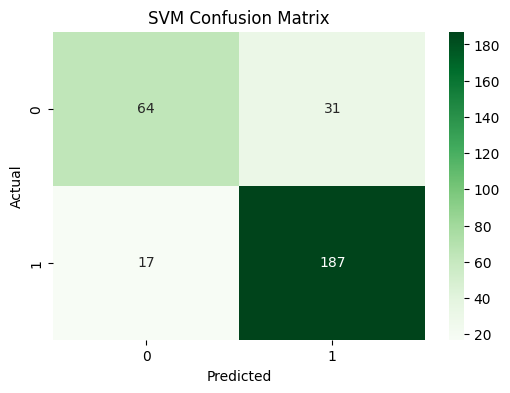

Accuracy: 0.8394648829431438
Precision: 0.8577981651376146
Recall: 0.9166666666666666
F1 Score: 0.886255924170616


In [52]:
# Calculate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Evaluation metrics
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
precision_svm = metrics.precision_score(y_test, y_pred_svm)
recall_svm = metrics.recall_score(y_test, y_pred_svm)
f1_svm = metrics.f1_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)